In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics
!pip install -r requirements.txt

Cloning into 'ultralytics'...
remote: Enumerating objects: 29602, done.
remote: Counting objects: 100% (230/230), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 29602 (delta 125), reused 142 (delta 69), pack-reused 29372
Receiving objects: 100% (29602/29602), 15.13 MiB | 8.23 MiB/s, done.
Resolving deltas: 100% (21291/21291), done.
/content/ultralytics
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
import torch
from IPython.display import clear_output
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


Setup complete. Using torch 2.3.0+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


In [ ]:
!pip install roboflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="Qo4EU7c1Mvw8Tr6OwAwz")
project = rf.workspace("azmary").project("tumor-detection-q9dpw")
version = project.version(2)
dataset = version.download("yolov8-obb")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tumor-Detection-2 in yolov8-obb:: 100%|██████████| 76/76 [00:00<00:00, 3705.30it/s]


In [ ]:
dataset.location

'/content/ultralytics/Tumor-Detection-2'

In [ ]:
%cat {dataset.location}/data.yaml

path: ../datasets/roboflow

train: train/images
val: valid/images
test: test/images

names: 
  0: tumor

In [ ]:
import yaml

with open(f"{dataset.location}/data.yaml", 'r') as file:
    data_yaml = yaml.safe_load(file)


data_yaml['train'] = f"{dataset.location}/train/images"
data_yaml['val'] = f"{dataset.location}/valid/images"

with open(f"{dataset.location}/data.yaml", 'w') as file:
    yaml.dump(data_yaml, file)


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8n-obb.yaml")
model = YOLO("yolov8n-obb.pt")
model = YOLO("yolov8n-obb.yaml").load("yolov8n-obb.pt")

100%|██████████| 6.24M/6.24M [00:00<00:00, 94.7MB/s]


Transferred 361/397 items from pretrained weights


In [ ]:
results = model.train(data=f"{dataset.location}/data.yaml", epochs=200, imgsz=640)

Ultralytics YOLOv8.2.53 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolov8n-obb.yaml, data=/content/ultralytics/Tumor-Detection-2/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 25.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 119MB/s]


AMP: checks passed ✅


train: Scanning /content/ultralytics/Tumor-Detection-2/train/labels... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<00:00, 854.17it/s]

train: New cache created: /content/ultralytics/Tumor-Detection-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/ultralytics/Tumor-Detection-2/valid/labels... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<00:00, 1035.41it/s]

val: New cache created: /content/ultralytics/Tumor-Detection-2/valid/labels.cache


Plotting labels to /content/ultralytics/runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/ultralytics/runs/obb/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.42G      1.766      3.845      2.265         37        640:  50%|█████     | 1/2 [00:01<00:01,  1.83s/it]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
      1/200      2.42G      1.633      3.858      2.211         10        640: 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all          7          8    0.00381          1    0.00802     0.0042



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200       2.3G      1.798      3.977      2.347         10        640: 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all          7          8    0.00381          1    0.00801    0.00405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.39G      1.897      3.794      2.393         16        640: 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all          7          8    0.00381          1    0.00922    0.00606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.33G      1.934      3.786      2.538         15        640: 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all          7          8    0.00381          1     0.0336     0.0159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.33G      1.475      3.584      1.999         10        640: 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

                   all          7          8    0.00381          1      0.315      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.33G      1.442      3.067      1.882         14        640: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all          7          8    0.00381          1       0.65      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.33G      1.343      2.985      1.886          9        640: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]

                   all          7          8    0.00381          1      0.773      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.33G      1.208      2.455      1.686         14        640: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all          7          8      0.725       0.75      0.775      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.33G      1.108      2.649      1.677          8        640: 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all          7          8      0.749      0.748      0.756      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.34G      1.188      2.881      1.724          8        640: 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all          7          8      0.705       0.75      0.813      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.34G      1.092       2.85      1.756          5        640: 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all          7          8      0.732       0.75        0.8      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.34G       1.27      3.049      2.039         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all          7          8      0.724       0.75        0.8      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.34G      1.094      2.386      1.913          8        640: 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]

                   all          7          8      0.842       0.75      0.808       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.34G     0.9928       1.86      1.697         19        640: 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all          7          8      0.837      0.646      0.796      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.34G      1.277      2.533      1.919         12        640: 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all          7          8      0.858        0.5      0.764      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.34G      1.112      2.466      1.907          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all          7          8      0.715      0.625       0.79      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.34G      1.077      2.011      1.594          8        640: 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all          7          8      0.744      0.728      0.828      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.34G     0.8686      1.775      1.496          7        640: 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]

                   all          7          8      0.675       0.75      0.824      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.34G      1.007       1.79      1.571         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all          7          8      0.691      0.841       0.75      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.34G       0.92      1.805      1.869          9        640: 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all          7          8      0.607      0.625      0.587      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.34G      1.102      1.665      2.022         13        640: 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all          7          8      0.701      0.625      0.624      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.34G     0.9429      1.683      1.633         10        640: 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all          7          8      0.853      0.726      0.836      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.34G      0.935      1.618      1.879         11        640: 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all          7          8      0.713       0.75      0.777      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.34G      1.152      1.966      2.035         10        640: 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all          7          8      0.742       0.75      0.801        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.34G     0.8858      1.423      1.589         13        640: 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all          7          8      0.691      0.842      0.762      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.34G     0.8347      1.444      1.497         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all          7          8      0.689      0.834      0.764      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.34G     0.7461      1.187      1.452         12        640: 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]

                   all          7          8      0.775      0.865      0.807      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.34G     0.8372      1.222      1.793         12        640: 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]

                   all          7          8      0.775      0.865      0.807      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.34G     0.8517      1.474      1.658          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

                   all          7          8        0.7      0.875      0.743      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.34G     0.9352      1.672      1.689          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all          7          8      0.842       0.75      0.765      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.34G     0.9708      1.441      1.608         13        640: 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all          7          8      0.842       0.75      0.765      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.34G      1.053      1.493      1.557          8        640: 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all          7          8      0.853      0.727       0.75      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.34G       1.08      1.531      1.677         24        640: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all          7          8      0.847      0.699      0.783      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.34G     0.9092      1.548       1.61          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all          7          8      0.847      0.699      0.783      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.34G     0.8337      1.191       1.47         14        640: 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all          7          8      0.769      0.875      0.794      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.34G     0.8707       1.26      1.533         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all          7          8       0.85      0.875      0.813      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.34G     0.9638      1.337      1.543         18        640: 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all          7          8       0.85      0.875      0.813      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.34G     0.8565      1.081      1.434         18        640: 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all          7          8      0.858      0.875      0.813       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.34G     0.7555      1.145      1.442         11        640: 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all          7          8      0.847      0.875      0.845      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.34G     0.7289      1.138      1.511         15        640: 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]

                   all          7          8      0.847      0.875      0.845      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.34G     0.7807      1.176      1.401         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]


                   all          7          8      0.848      0.875      0.846      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.34G     0.7879      1.262      1.598         12        640: 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all          7          8      0.986      0.875      0.904      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.34G       0.63       1.02      1.531         15        640: 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]

                   all          7          8      0.986      0.875      0.904      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.34G     0.7726      1.293      1.522          8        640: 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all          7          8      0.993      0.875      0.895      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.34G     0.6903      1.097      1.637         11        640: 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all          7          8      0.993      0.875      0.895      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.34G     0.7585      1.231       1.64         10        640: 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all          7          8      0.865      0.875       0.86      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.34G     0.9421      1.195      1.777         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all          7          8      0.865      0.875       0.86      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.34G      0.673     0.9453      1.542         17        640: 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all          7          8      0.858      0.875      0.845        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.34G     0.6994      1.033      1.551         25        640: 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all          7          8      0.858      0.875      0.845        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.34G     0.7603      1.085      1.674          8        640: 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]

                   all          7          8      0.771      0.875      0.829       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.34G      0.726      1.088      1.665         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all          7          8      0.771      0.875      0.829       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.34G     0.8036      1.369      1.721          7        640: 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all          7          8      0.769      0.875      0.829      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.34G     0.6783      1.023      1.449         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]

                   all          7          8      0.769      0.875      0.829      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.34G     0.7366     0.9942      1.396         15        640: 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.95it/s]

                   all          7          8      0.874       0.87       0.86       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.34G     0.7334      1.016      1.454         15        640: 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]


                   all          7          8      0.874       0.87       0.86       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.34G     0.7103      1.031      1.475         19        640: 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]

                   all          7          8          1      0.871      0.876       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.34G     0.7942      1.031      1.537          9        640: 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all          7          8          1      0.871      0.876       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.34G     0.6804     0.9547      1.414         16        640: 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all          7          8      0.992      0.875      0.876      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.34G     0.8117     0.9843      1.581         13        640: 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all          7          8      0.992      0.875      0.876      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.34G      0.698     0.9222      1.425         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]

                   all          7          8      0.987      0.875      0.876      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.34G     0.7639     0.8687      1.551         14        640: 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all          7          8      0.987      0.875      0.876      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.34G      0.682     0.9739      1.525          7        640: 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.47it/s]

                   all          7          8       0.99      0.875      0.875      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.34G     0.6103     0.9079      1.416         11        640: 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all          7          8       0.99      0.875      0.875      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.34G     0.5439     0.8936      1.327          8        640: 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]

                   all          7          8      0.997      0.875      0.875      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.34G      0.536     0.7823      1.279          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.71it/s]

                   all          7          8      0.997      0.875      0.875      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.34G     0.7359      1.235      1.713          7        640: 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all          7          8      0.986       0.75      0.847      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.34G     0.7227     0.9426       1.44         10        640: 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all          7          8      0.986       0.75      0.847      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.34G       0.75     0.8599      1.424         15        640: 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all          7          8      0.986       0.75      0.824      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.34G     0.7575      1.056      1.521          8        640: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all          7          8      0.986       0.75      0.824      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.34G     0.6951     0.8679      1.455         13        640: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all          7          8      0.978       0.75      0.848      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.34G     0.6335     0.8173      1.437         11        640: 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all          7          8      0.978       0.75      0.848      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.34G     0.7066     0.8977      1.601          8        640: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all          7          8       0.95       0.75      0.884      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.34G     0.6276     0.8533      1.445         14        640: 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]

                   all          7          8       0.95       0.75      0.884      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.34G     0.7037      1.028      1.689          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.86it/s]

                   all          7          8      0.883       0.75      0.889      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.34G     0.6919     0.8981      1.776         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]

                   all          7          8      0.883       0.75      0.889      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.34G      0.538     0.7584      1.533         13        640: 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]

                   all          7          8      0.889       0.75      0.899      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.34G     0.5668     0.6867       1.25         20        640: 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all          7          8      0.889       0.75      0.899      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.34G     0.5194     0.7284      1.207          8        640: 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all          7          8      0.922       0.75      0.899      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.34G      0.603     0.8209      1.609         10        640: 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.06it/s]

                   all          7          8      0.922       0.75      0.899      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.34G     0.6383     0.8542      1.529         10        640: 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.24it/s]

                   all          7          8      0.956       0.75      0.902      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.34G     0.5324     0.7273      1.481         14        640: 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]

                   all          7          8      0.956       0.75      0.902      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.34G     0.6241     0.8583      1.612          8        640: 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all          7          8      0.975       0.75       0.91      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.34G     0.7564     0.9105      1.608          9        640: 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all          7          8      0.975       0.75       0.91      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.34G     0.7095     0.7407      1.494         10        640: 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all          7          8      0.985       0.75        0.9      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.34G     0.5854     0.7415      1.468         10        640: 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all          7          8      0.985       0.75        0.9      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.34G     0.5564     0.6662      1.421         17        640: 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.06it/s]

                   all          7          8      0.986       0.75      0.906       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.34G     0.6355     0.7363      1.397          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.19it/s]

                   all          7          8      0.986       0.75      0.906       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.34G      0.512     0.6902      1.397          8        640: 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]

                   all          7          8          1      0.859        0.9      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.34G     0.4898     0.5857      1.316         12        640: 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]


                   all          7          8          1      0.859        0.9      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.34G     0.5504     0.6876      1.449         10        640: 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all          7          8      0.998      0.875      0.879      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.34G     0.5078     0.6638      1.499         17        640: 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]

                   all          7          8      0.998      0.875      0.879      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.34G     0.5707     0.7305      1.477         13        640: 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all          7          8      0.986      0.875      0.878      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.34G     0.5192     0.5851      1.283         15        640: 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]

                   all          7          8      0.986      0.875      0.878      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.34G     0.6944     0.7826      1.525          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all          7          8      0.984      0.875      0.879      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.34G     0.5423     0.6407      1.474         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all          7          8      0.984      0.875      0.879      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.34G     0.5172     0.6214      1.393         12        640: 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]


                   all          7          8      0.982      0.875      0.878      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.34G      0.495     0.6279      1.565         11        640: 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all          7          8      0.982      0.875      0.878      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.34G     0.5808     0.7448      1.573          8        640: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all          7          8      0.983      0.875      0.881      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.34G     0.5174     0.6083      1.462         16        640: 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all          7          8      0.983      0.875      0.881      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.34G     0.5826     0.6078      1.535         12        640: 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.81it/s]

                   all          7          8      0.979      0.875      0.892      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.34G     0.4794     0.6291      1.479          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]

                   all          7          8      0.979      0.875      0.892      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.34G      0.536      0.651      1.572         12        640: 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.37it/s]

                   all          7          8      0.986      0.875      0.904      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.34G     0.6387     0.6626       1.74         12        640: 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]

                   all          7          8      0.986      0.875      0.904      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.34G     0.5385       0.62      1.459         16        640: 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all          7          8       0.99      0.875      0.912      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.34G     0.5836     0.7024      1.641         10        640: 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


                   all          7          8       0.99      0.875      0.912      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.34G     0.5336     0.6343      1.604          7        640: 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]

                   all          7          8      0.992      0.875      0.928      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.34G      0.768     0.8065      2.267          7        640: 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all          7          8      0.992      0.875      0.928      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.34G     0.4768     0.6038      1.473          8        640: 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]


                   all          7          8          1      0.869      0.931      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.34G     0.5451     0.7116      1.552          8        640: 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all          7          8          1      0.869      0.931      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.34G      0.626     0.7262      1.605         11        640: 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all          7          8      0.859      0.875      0.873      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.34G     0.4543     0.5445      1.355         14        640: 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all          7          8      0.859      0.875      0.873      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.34G     0.5154     0.6155      1.457         11        640: 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all          7          8      0.871      0.846      0.869      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.34G     0.5261     0.5651       1.44         13        640: 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]

                   all          7          8      0.871      0.846      0.869      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.34G     0.4595     0.5365      1.349         15        640: 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]

                   all          7          8      0.986       0.75      0.867      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.34G     0.6175     0.7226      1.632         10        640: 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.83it/s]

                   all          7          8      0.986       0.75      0.867      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.34G     0.4208     0.4873      1.302         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]

                   all          7          8      0.986       0.75      0.878      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.34G     0.4855     0.5532       1.43         20        640: 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]

                   all          7          8      0.986       0.75      0.878      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.34G     0.6851     0.6993      1.516         15        640: 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.76it/s]

                   all          7          8      0.989       0.75      0.886      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.34G     0.5979     0.6055      1.682         10        640: 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all          7          8      0.989       0.75      0.886      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.34G     0.6108     0.7907       1.59         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all          7          8          1      0.866      0.887      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.34G     0.4359     0.5394      1.377         13        640: 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]

                   all          7          8          1      0.866      0.887      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.34G     0.5233     0.5851      1.556         18        640: 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]

                   all          7          8          1      0.866      0.887      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.34G     0.4919     0.5731      1.579          9        640: 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


                   all          7          8          1      0.866      0.887      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.34G     0.5313     0.5983      1.646         12        640: 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all          7          8      0.873      0.862      0.897      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.34G     0.5133     0.6131      1.621         22        640: 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all          7          8      0.873      0.862      0.897      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.34G       0.46     0.5089      1.372         16        640: 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all          7          8      0.873      0.863      0.927      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.34G     0.4161     0.4896       1.29         18        640: 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]


                   all          7          8      0.873      0.863      0.927      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.34G     0.4712     0.6439      1.387         11        640: 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all          7          8      0.873      0.863      0.946      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.34G     0.4571     0.6375      1.324         13        640: 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]

                   all          7          8      0.873      0.863      0.946      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.34G     0.5284     0.5772       1.54         14        640: 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]

                   all          7          8      0.976       0.75      0.933      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.34G     0.4538     0.5309      1.408         12        640: 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.07it/s]

                   all          7          8      0.976       0.75      0.933      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.34G     0.3344     0.5103      1.132          7        640: 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.99it/s]

                   all          7          8      0.981       0.75      0.933      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.34G     0.5809     0.6972      1.604         12        640: 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.34it/s]

                   all          7          8      0.981       0.75      0.933      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.34G     0.4455     0.5216      1.495         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.33it/s]

                   all          7          8      0.873      0.864      0.946      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.34G     0.5414     0.5677       1.61         14        640: 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.77it/s]

                   all          7          8      0.873      0.864      0.946      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.34G      0.475     0.5273       1.48         14        640: 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all          7          8      0.874      0.867      0.946      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.34G     0.4508      0.507      1.439         14        640: 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all          7          8      0.874      0.867      0.946      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.34G     0.4727     0.5017      1.404         18        640: 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.54it/s]

                   all          7          8      0.875      0.873      0.946      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.34G     0.3348     0.4558      1.196         21        640: 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]

                   all          7          8      0.875      0.873      0.946      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.34G     0.5104     0.5541      1.683          7        640: 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]

                   all          7          8      0.859      0.875      0.955      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.34G     0.4643     0.5234      1.717         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.64it/s]

                   all          7          8      0.859      0.875      0.955      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.34G     0.4243     0.4848      1.383         11        640: 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


                   all          7          8          1      0.867      0.971      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.34G     0.4681     0.5608      1.643         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all          7          8          1      0.867      0.971      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.34G     0.6154     0.6104      1.781          9        640: 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.27it/s]

                   all          7          8          1       0.87      0.971      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.34G     0.5405     0.5544      1.618         10        640: 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]

                   all          7          8          1       0.87      0.971      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.34G     0.3667     0.4596      1.293         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]

                   all          7          8          1      0.872      0.971      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.34G     0.5099     0.5104      1.493         14        640: 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all          7          8          1      0.872      0.971      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.34G     0.3849     0.4472      1.338          9        640: 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]

                   all          7          8      0.997      0.875      0.971      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.34G     0.5611     0.5992      1.703         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all          7          8      0.997      0.875      0.971      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.34G     0.4631     0.5246      1.413         17        640: 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]

                   all          7          8      0.993      0.875      0.971      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.34G     0.4066     0.4479      1.388         10        640: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all          7          8      0.993      0.875      0.971      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.34G     0.4194     0.4403      1.386         13        640: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all          7          8      0.992      0.875      0.971      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.34G     0.4734     0.5135      1.503         13        640: 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]


                   all          7          8      0.992      0.875      0.971      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.34G      0.521     0.5527      1.716          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all          7          8      0.992      0.875      0.971      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.34G     0.5025     0.5627      1.766          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]

                   all          7          8      0.992      0.875      0.971      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.34G      0.317     0.4115      1.269         10        640: 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]

                   all          7          8      0.992      0.875      0.971      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.34G      0.437     0.4984      1.392         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.43it/s]

                   all          7          8      0.992      0.875      0.971      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.34G     0.4008     0.4976      1.565          8        640: 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all          7          8      0.992      0.875      0.971      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.34G     0.3614     0.4332      1.384         15        640: 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all          7          8      0.992      0.875      0.971      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.34G     0.3479     0.4244      1.312         11        640: 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]

                   all          7          8      0.991      0.875      0.971      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.34G      0.389     0.4595       1.41         12        640: 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]

                   all          7          8      0.991      0.875      0.971      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.34G     0.5799      0.591      1.688          7        640: 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all          7          8      0.991      0.875      0.971      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.34G     0.4254       0.43      1.433         14        640: 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all          7          8      0.991      0.875      0.971      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.34G     0.3817     0.4372      1.346          8        640: 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all          7          8      0.992      0.875      0.971      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      2.34G     0.3729     0.4972       1.48          8        640: 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all          7          8      0.992      0.875      0.971      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.34G      0.332     0.4186      1.391         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]

                   all          7          8      0.992      0.875      0.971       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.34G     0.3369     0.4522      1.323         15        640: 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all          7          8      0.992      0.875      0.971       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.34G     0.3081     0.4035      1.244         12        640: 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all          7          8      0.992      0.875      0.962      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.34G     0.4106     0.5121      1.524          8        640: 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]

                   all          7          8      0.992      0.875      0.962      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.34G     0.3812     0.4802      1.489         16        640: 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]

                   all          7          8      0.992      0.875      0.962      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.34G      0.401     0.4891      1.603         12        640: 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all          7          8      0.992      0.875      0.962      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.34G     0.3233      0.442      1.423         13        640: 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.02it/s]

                   all          7          8      0.992      0.875      0.962       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      2.34G     0.4975     0.5212      1.754         10        640: 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all          7          8      0.992      0.875      0.962       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.34G     0.4161     0.5043      1.595         16        640: 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all          7          8      0.992      0.875      0.962      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      2.34G     0.5059     0.7461      1.569          6        640: 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


                   all          7          8      0.992      0.875      0.962      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.34G     0.4634     0.6263      1.538          8        640: 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.34it/s]

                   all          7          8      0.992      0.875      0.962      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      2.34G     0.3905     0.4664      1.369         11        640: 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all          7          8      0.992      0.875      0.962      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.34G     0.3922     0.4347      1.438         14        640: 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


                   all          7          8      0.991      0.875      0.955      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.34G      0.352     0.4193      1.458         13        640: 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all          7          8      0.991      0.875      0.955      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.34G     0.5718     0.6828       1.69          7        640: 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.88it/s]

                   all          7          8      0.992      0.875      0.955      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.34G     0.4426     0.5006      1.551          8        640: 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.70it/s]

                   all          7          8      0.992      0.875      0.955      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.34G      0.518     0.5566      1.614          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]

                   all          7          8      0.991      0.875      0.962      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.34G     0.3189     0.4214      1.254         12        640: 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all          7          8      0.991      0.875      0.962      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.34G     0.4348     0.4496      1.545          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.80it/s]

                   all          7          8      0.991      0.875      0.962      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      2.34G     0.4299     0.4671      1.561         13        640: 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]

                   all          7          8      0.991      0.875      0.962      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.34G     0.3955     0.5006      1.547          8        640: 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]

                   all          7          8      0.992      0.875      0.962      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.34G     0.3152     0.4334      1.344          9        640: 100%|██████████| 2/2 [00:00<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]

                   all          7          8      0.992      0.875      0.962      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.34G     0.3176     0.4147      1.348         11        640: 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all          7          8      0.992      0.875      0.955      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      2.34G     0.3621     0.4459      1.394         15        640: 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all          7          8      0.992      0.875      0.955      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      2.34G     0.4973     0.5448      1.717         14        640: 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all          7          8      0.992      0.875      0.949      0.833


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.34G     0.2576     0.4194       1.19          7        640: 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all          7          8      0.992      0.875      0.949      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.34G     0.2612     0.3793      1.215          7        640: 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all          7          8      0.991      0.875      0.955      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      2.23G     0.2665      0.417      1.335          8        640: 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]

                   all          7          8      0.991      0.875      0.955      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      2.34G     0.2704     0.4235      1.197          8        640: 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all          7          8      0.992      0.875      0.949      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      2.34G     0.2282     0.3789      1.209          6        640: 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.86it/s]

                   all          7          8      0.992      0.875      0.949      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.34G     0.2683     0.4206      1.272          6        640: 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.04it/s]

                   all          7          8      0.992      0.875      0.949        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      2.34G      0.275     0.4229      1.232          7        640: 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all          7          8      0.992      0.875      0.949        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.34G      0.272     0.4035      1.218          8        640: 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]

                   all          7          8      0.992      0.875      0.949        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      2.34G      0.266     0.4148      1.274          7        640: 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

                   all          7          8      0.992      0.875      0.949        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.34G     0.2482     0.4183      1.231          7        640: 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all          7          8      0.992      0.875      0.962      0.816



200 epochs completed in 0.075 hours.
Optimizer stripped from /content/ultralytics/runs/obb/train/weights/last.pt, 6.6MB
Optimizer stripped from /content/ultralytics/runs/obb/train/weights/best.pt, 6.6MB

Validating /content/ultralytics/runs/obb/train/weights/best.pt...
Ultralytics YOLOv8.2.53 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-obb summary (fused): 187 layers, 3077414 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


                   all          7          8      0.992      0.875      0.962      0.842
Speed: 0.3ms preprocess, 3.6ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to /content/ultralytics/runs/obb/train


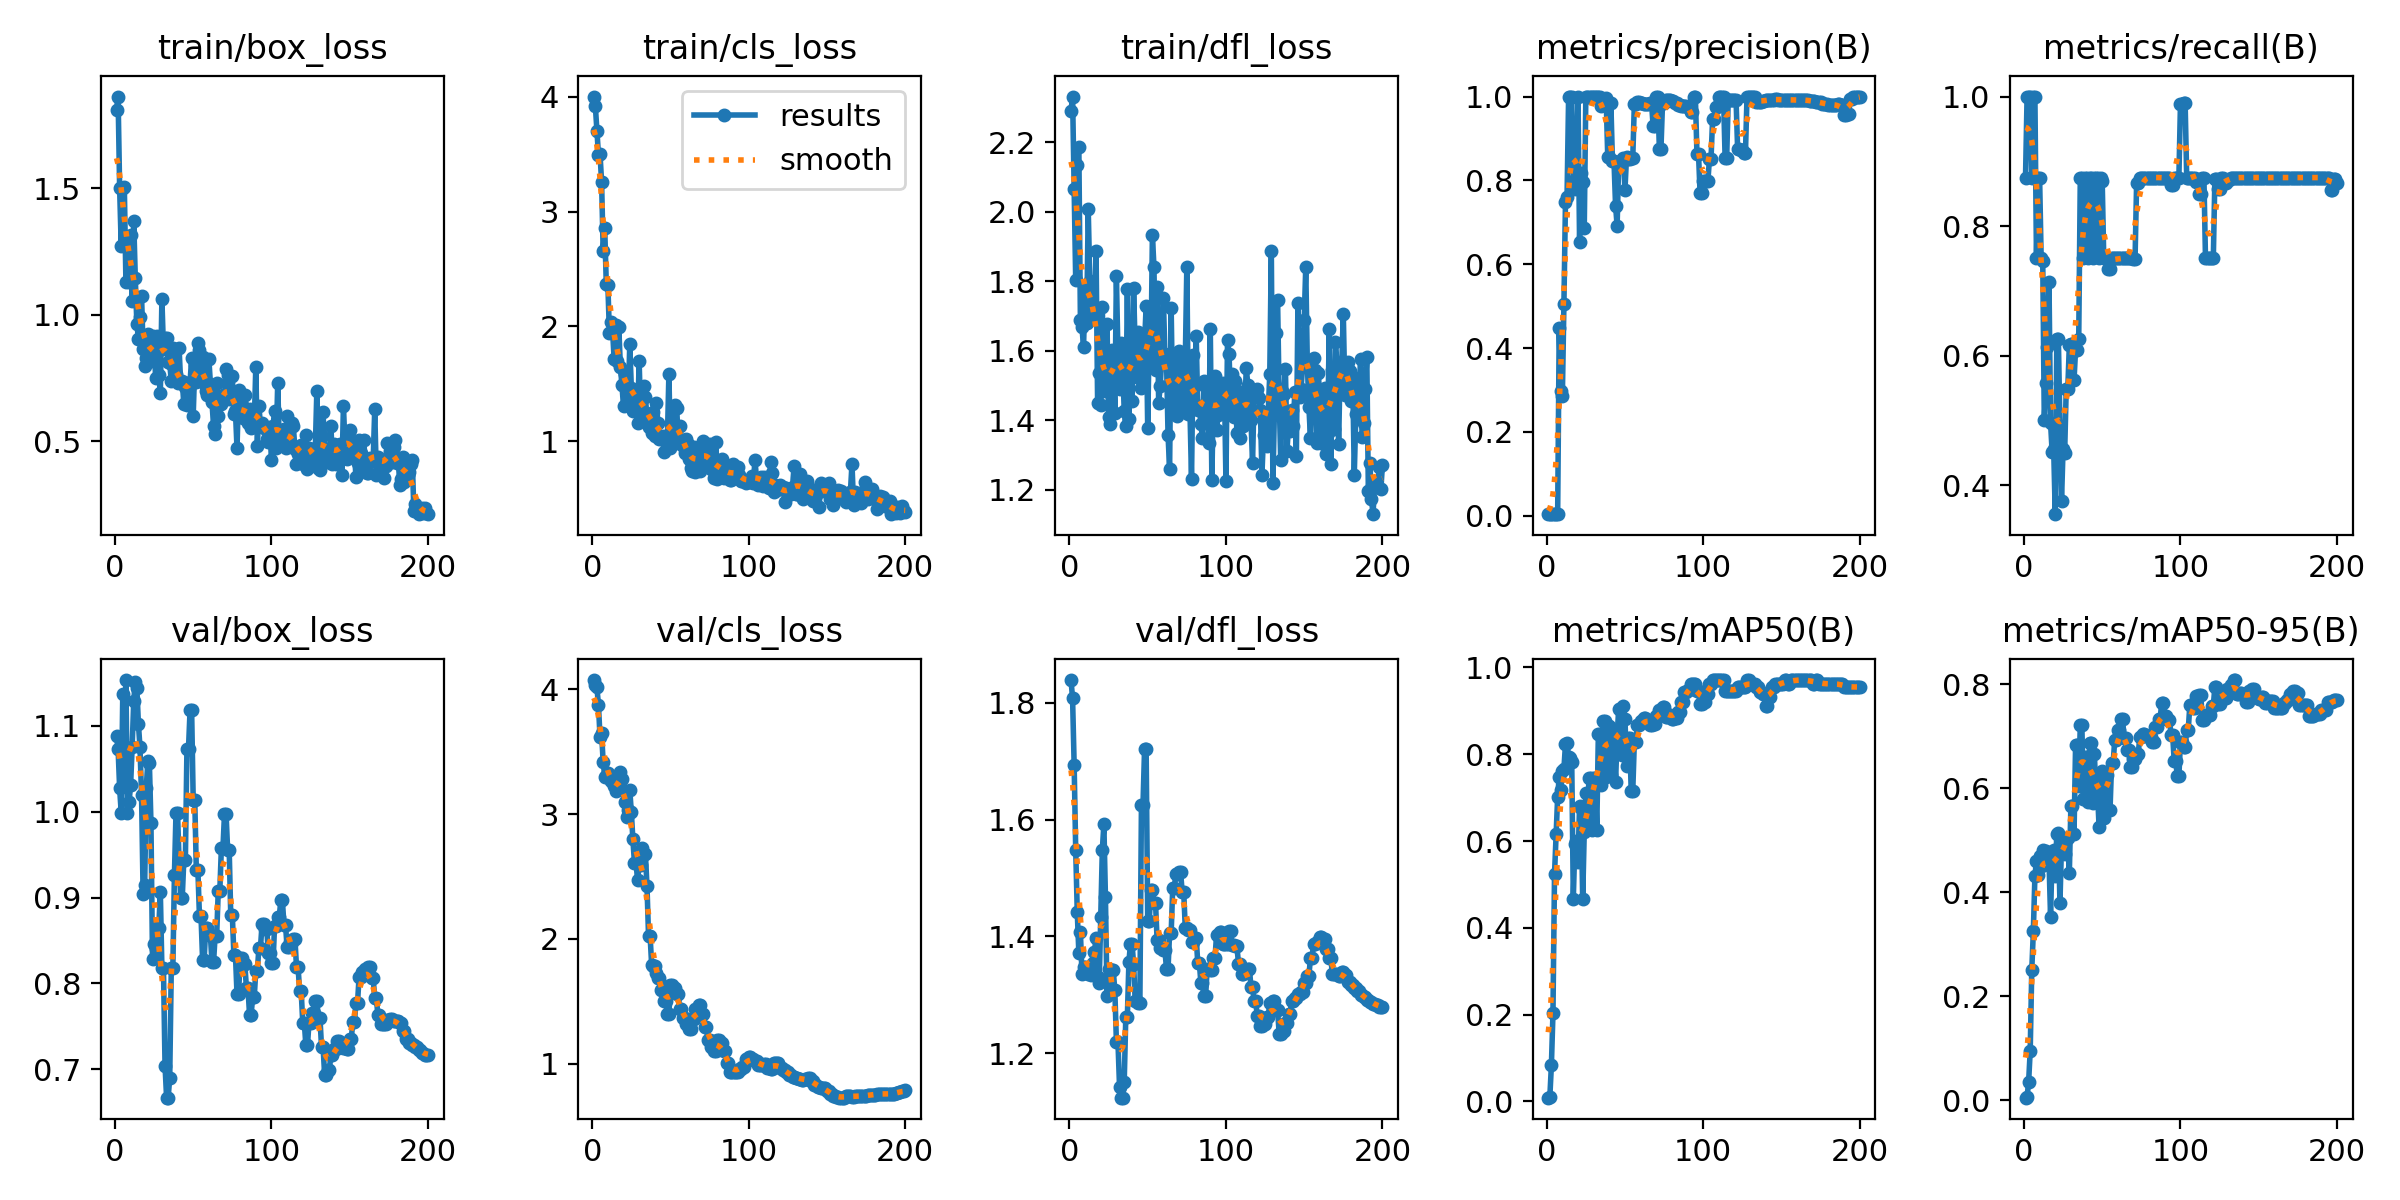

In [ ]:
from IPython.display import Image, display

# Display the results image
image_path = '/content/ultralytics/runs/obb/train/results.png'
display(Image(filename=image_path, width=1000))


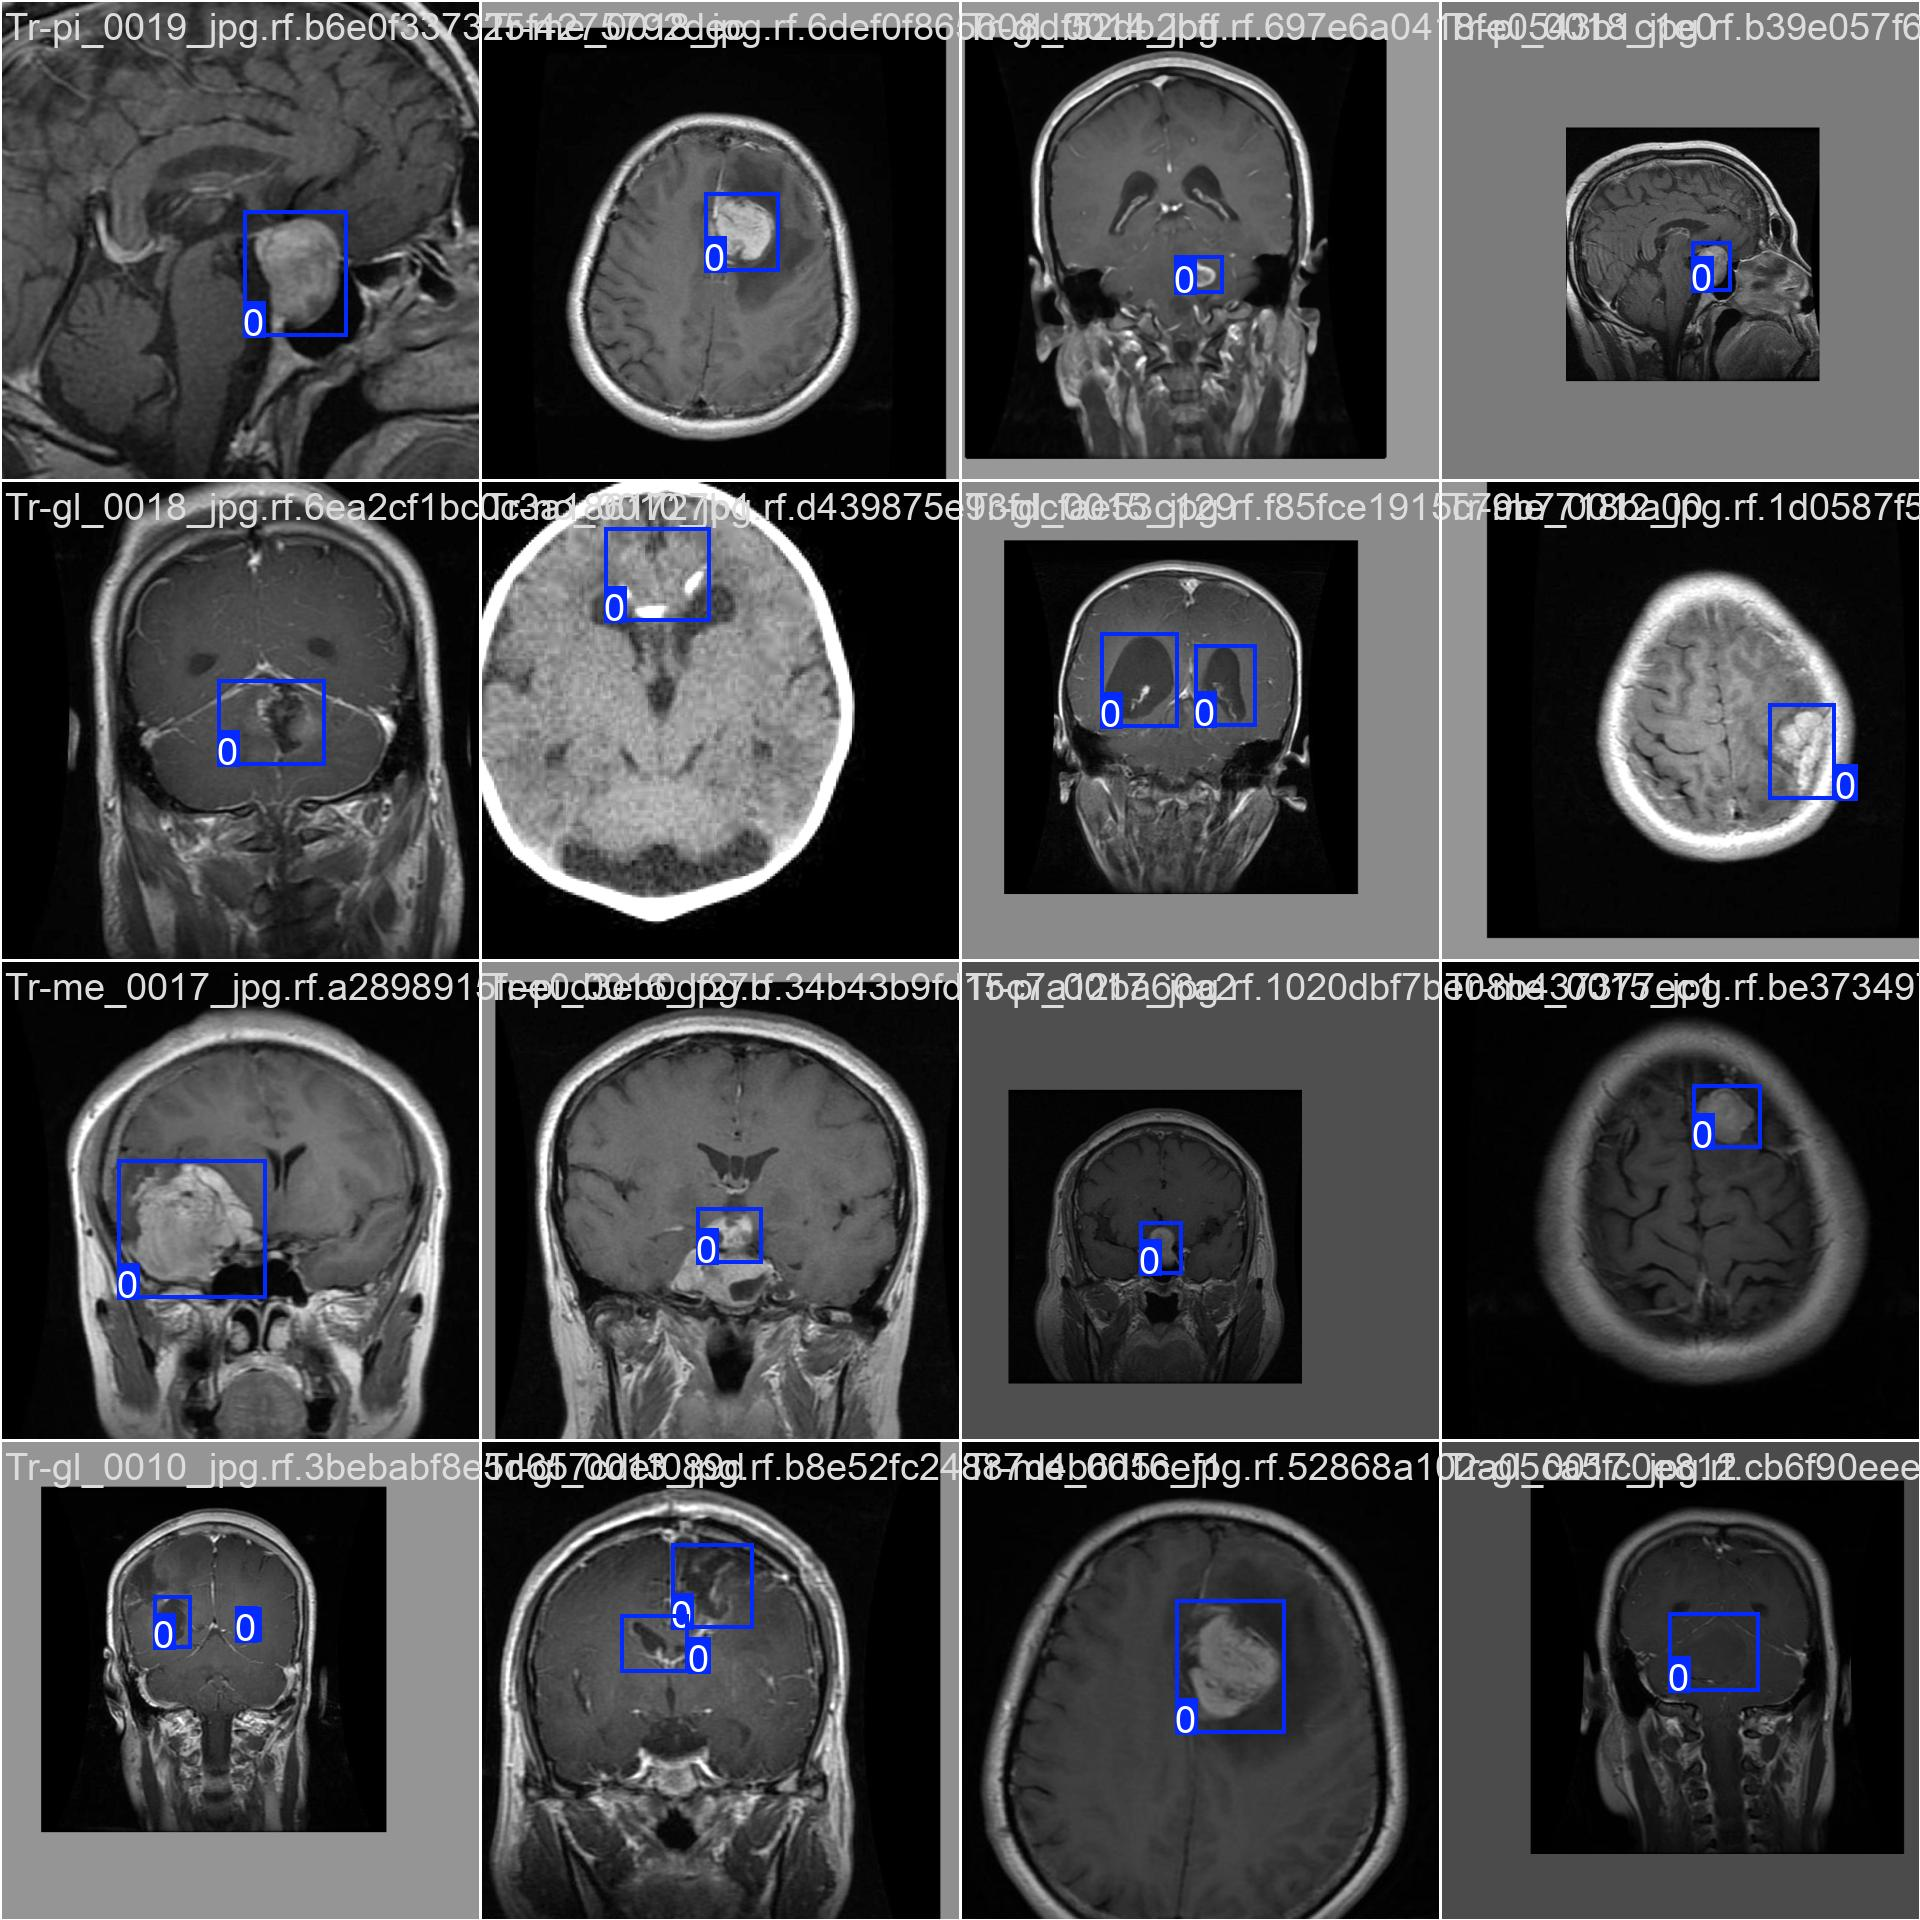

In [ ]:
image_path = '/content/ultralytics/runs/obb/train/train_batch382.jpg'
display(Image(filename=image_path, width=1000))

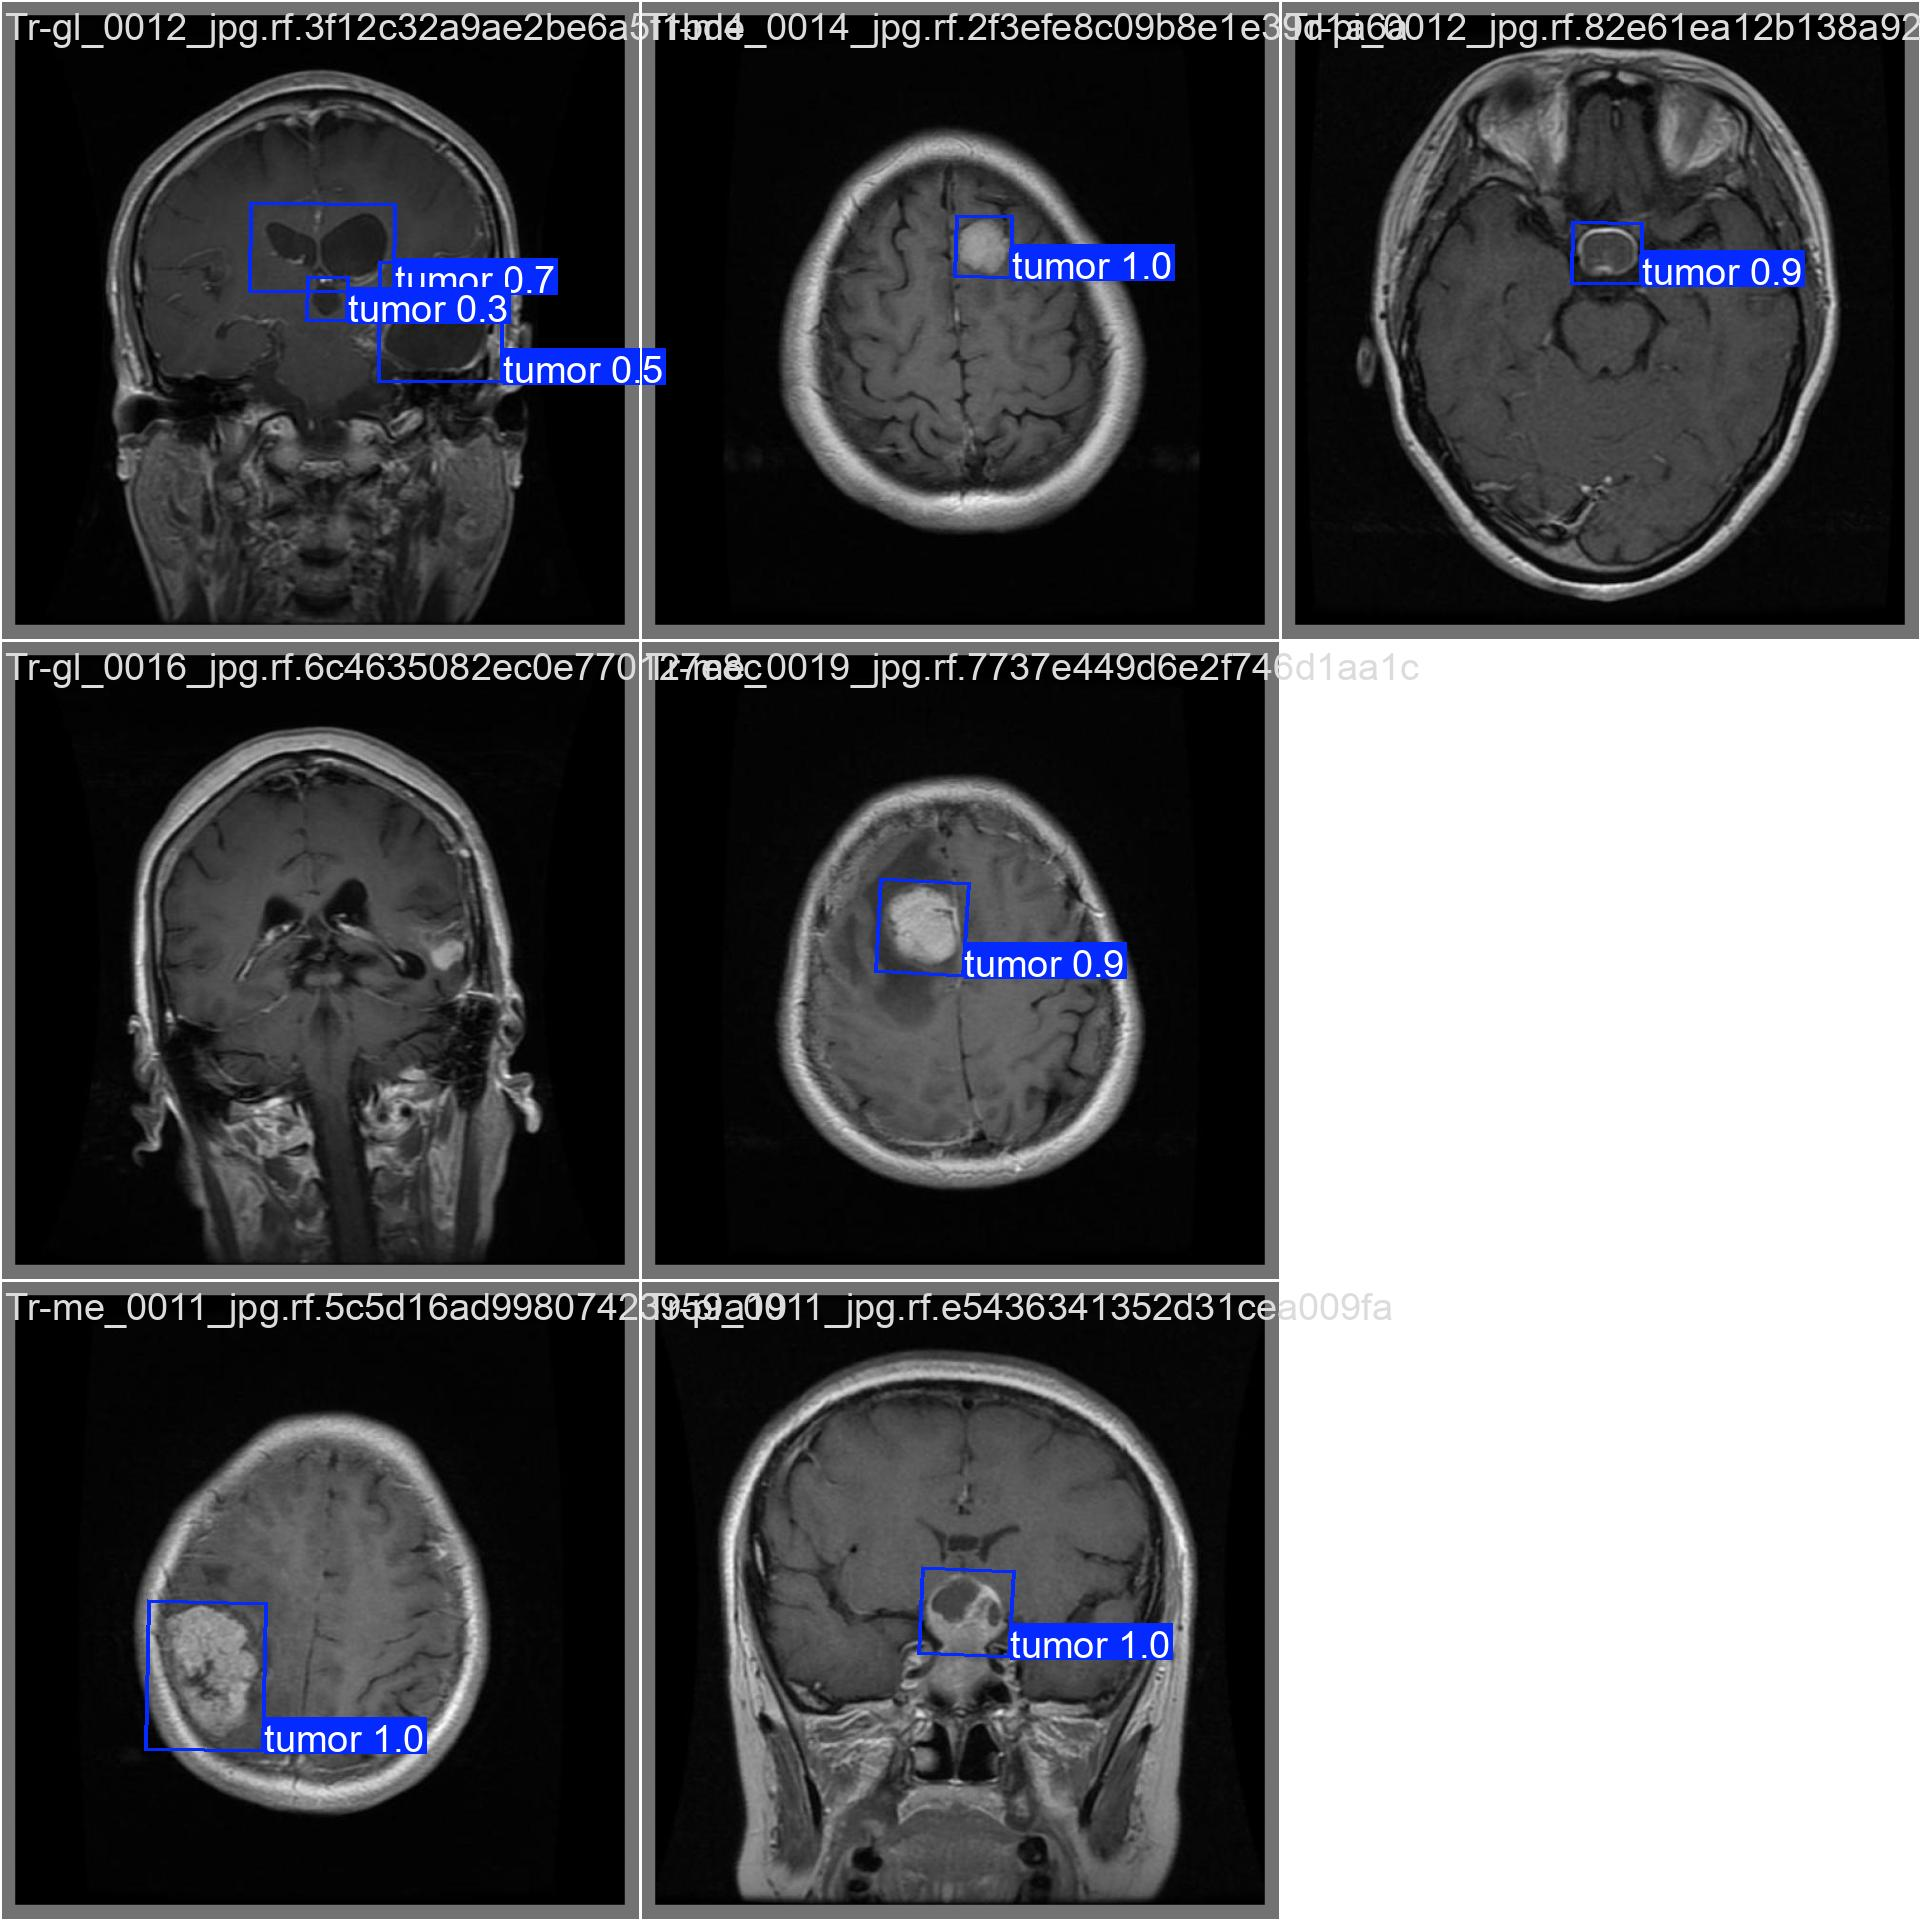

In [ ]:
image_path = '/content/ultralytics/runs/obb/train/val_batch0_pred.jpg'
display(Image(filename=image_path, width=1000))

In [ ]:
!yolov8n detect predict model="/content/best.pt" source='/content/ultralytics/Tumor-Detection-2/test/images/Tr-gl_0019_jpg.rf.abcbb0d9ce5243047f524e9223a828e9.jpg' show_labels = False conf = 0.5

/bin/bash: line 1: yolov8n: command not found


In [ ]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [ ]:
from ultralytics import YOLO
model = YOLO("/content/best.pt")

In [ ]:
results = model.predict(source='/content/ultralytics/Tumor-Detection-2/test/images/Tr-me_0013_jpg.rf.e00009eb25a65a202fe95f4c6a60fd3c.jpg', conf=0.5, show_labels=False)
print(results)


image 1/1 /content/ultralytics/Tumor-Detection-2/test/images/Tr-me_0013_jpg.rf.e00009eb25a65a202fe95f4c6a60fd3c.jpg: 640x640 301.7ms
Speed: 8.9ms preprocess, 301.7ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'tumor'}
obb: ultralytics.engine.results.OBB object
orig_img: array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        

In [ ]:
save_dir = '/content'
save_path = f"{save_dir}/Tr-me_0013_jpg.rf.e00009eb25a65a202fe95f4c6a60fd3c.jpg"

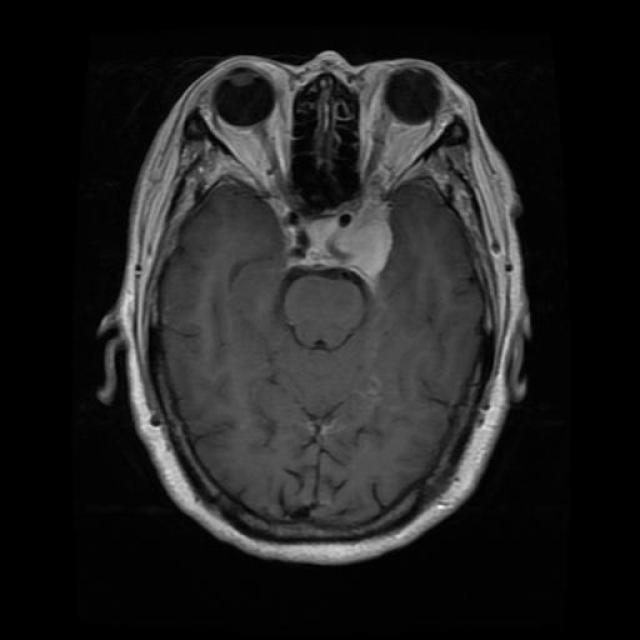

In [ ]:
image_path = '/content/ultralytics/Tumor-Detection-2/test/images/Tr-me_0013_jpg.rf.e00009eb25a65a202fe95f4c6a60fd3c.jpg'
display(Image(filename=image_path, width=1000))

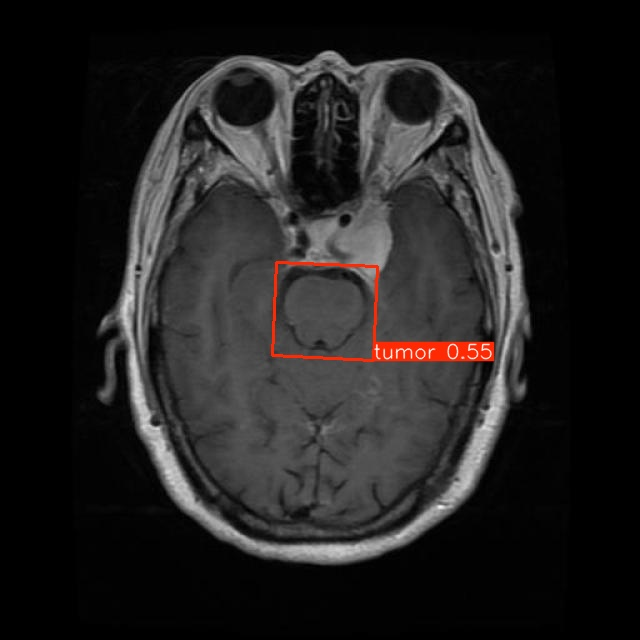

In [ ]:
os.makedirs(save_dir, exist_ok=True)
predicted_image = results[0].plot()
cv2.imwrite(save_path, cv2.cvtColor(predicted_image, cv2.COLOR_RGB2BGR))
display(Image(filename=save_path, width=1000))